# Homework
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

You can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using wget link mentioned below:

```
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

In [1]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

### Loading the data
Use only the following columns:

- `'latitude'`,

- `'longitude'`,

- `'housing_median_age'`,

- `'total_rooms'`,

- `'total_bedrooms'`,

- `'population'`,

- `'households'`,

- `'median_income'`,

- `'median_house_value'`,

- `'ocean_proximity'`

- Fill NAs with 0.

- Apply the log tranform to `median_house_value`.

- Do train/validation/test split with `60%/20%/20%` distribution.

- Use `the train_test_split` function and set the random_state parameter to 1.

- Use `DictVectorizer` to turn the dataframe into matrices.

In [44]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
import xgboost as xgb

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
columns = ["latitude", "longitude", "housing_median_age", "total_rooms", "total_bedrooms", "population",
          "households", "median_income", "median_house_value", "ocean_proximity"]
df = df[columns]
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.total_bedrooms = df["total_bedrooms"].fillna(0)

In [8]:
df.median_house_value = np.log1p(df.median_house_value)
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

y_train[:10]

array([12.33754379, 10.91510665, 12.06968575, 11.69442168, 11.05565641,
       12.07254697, 12.46071874, 11.95825851, 11.04931734, 12.72695058])

In [12]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [13]:
del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

df_train.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,34.63,-118.18,19.0,3562.0,606.0,1677.0,578.0,4.1573,INLAND
1,34.69,-116.90,10.0,337.0,102.0,108.0,50.0,0.4999,INLAND


In [14]:
dv = DictVectorizer(sparse=False)

In [15]:
train_dicts = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)

In [16]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

### Question 1
Let's train a decision tree regressor to predict the `median_house_value` variable.

- Train a model with `max_depth=1`.

Which feature is used for splitting the data?

- `ocean_proximity=INLAND`
- `total_rooms`
- `latitude`
- `population`


In [17]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [18]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



/Users/patrickwalukagga/.local/share/virtualenvs/mlzoomcamp-twe4lI-M/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Question 2
Train a random forest model with these parameters:

- `n_estimators=10`
- `random_state=1`
- `n_jobs=-1 (optional - to make training faster)`

What's the RMSE of this model on validation?

- 0.05
- 0.25
- 0.55
- 0.85


In [19]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [20]:
y_pred = rf.predict(X_val)
y_pred[:10]

array([12.70112608, 13.08974669, 11.18974702, 12.42911492, 11.71102549,
       13.06104247, 11.66619662, 11.55160161, 13.11437626, 11.8708838 ])

In [21]:
y_val[:10], y_pred[:10]

(array([12.56898162, 13.12236738, 11.11989769, 12.52161669, 11.67760057,
        13.12236738, 11.84295557, 11.52782393, 13.12236738, 11.79056478]),
 array([12.70112608, 13.08974669, 11.18974702, 12.42911492, 11.71102549,
        13.06104247, 11.66619662, 11.55160161, 13.11437626, 11.8708838 ]))

In [22]:
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2)).round(2)
rmse

0.25

In [23]:
rf.score(X_val, y_val)

0.8138280201705104

In [24]:
rmse_scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2)).round(2)
    rmse_scores.append((n, rmse))

sorted(rmse_scores, key=lambda x: x[1])[:5]

[(40, 0.23), (50, 0.23), (60, 0.23), (70, 0.23), (80, 0.23)]

In [25]:
df_rmse_scores = pd.DataFrame(rmse_scores, columns=['n_estimators', 'rmse'])
df_rmse_scores.head(10)

,n_estimators,rmse
0,10,0.25
1,20,0.24
2,30,0.24
3,40,0.23
4,50,0.23
5,60,0.23
6,70,0.23
7,80,0.23
8,90,0.23
9,100,0.23


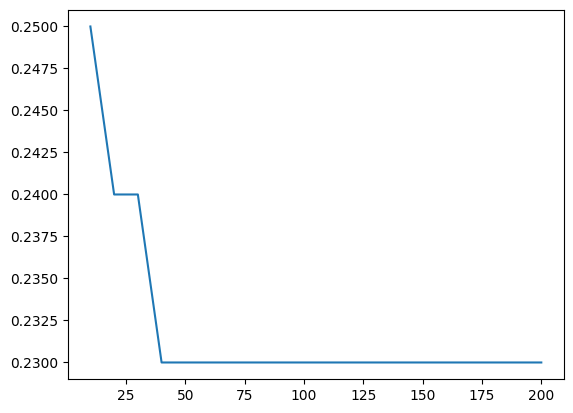

In [26]:
plt.plot(df_rmse_scores.n_estimators, df_rmse_scores.rmse);

In [27]:
best_n_estimator = 40

### Question 4
Let's select the best `max_depth`:

- Try different values of `max_depth`: `[10, 15, 20, 25]`
- For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
- Fix the random seed: `random_state=1`

What's the best max_depth:

- 10
- 15
- 20
- 25

In [28]:
rmse_scores = []
for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(max_depth=depth, n_estimators=n, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(np.mean((y_val - y_pred) ** 2)).round(2)
        rmse_scores.append((depth, n, rmse))

sorted(rmse_scores, key=lambda x: x[2])[:10]

[(15, 50, 0.23),
 (15, 60, 0.23),
 (15, 70, 0.23),
 (15, 80, 0.23),
 (15, 90, 0.23),
 (15, 100, 0.23),
 (15, 110, 0.23),
 (15, 120, 0.23),
 (15, 130, 0.23),
 (15, 140, 0.23)]

In [29]:
best_max_depth = 15

### Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the [feature_importances_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_) field.

For this homework question, we'll find the most important feature:

- Train the model with these parametes:
    - `n_estimators=10`,
    - `max_depth=20`,
    - `random_state=1`,
    - `n_jobs=-1 (optional)`
- Get the feature importance information from this model

What's the most important feature?

- `total_rooms`
- `median_income`
- `total_bedrooms`
- `longitude`

In [30]:
rf = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(np.mean((y_val - y_pred) ** 2)).round(2)
rmse

0.25

In [31]:
importances = rf.feature_importances_
importances

array([1.61407558e-02, 3.31967386e-02, 1.01333351e-01, 9.63405488e-02,
       3.63224176e-01, 2.76524800e-03, 3.10900842e-01, 3.56806263e-04,
       4.52770519e-04, 4.45219202e-03, 3.09988869e-02, 1.93726028e-02,
       2.04650818e-02])

In [50]:
features = dv.get_feature_names()
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [51]:
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp

ocean_proximity=ISLAND        0.000357
ocean_proximity=NEAR BAY      0.000453
ocean_proximity=<1H OCEAN     0.002765
ocean_proximity=NEAR OCEAN    0.004452
households                    0.016141
total_bedrooms                0.019373
total_rooms                   0.020465
population                    0.030999
housing_median_age            0.033197
longitude                     0.096341
latitude                      0.101333
ocean_proximity=INLAND        0.310901
median_income                 0.363224
dtype: float64

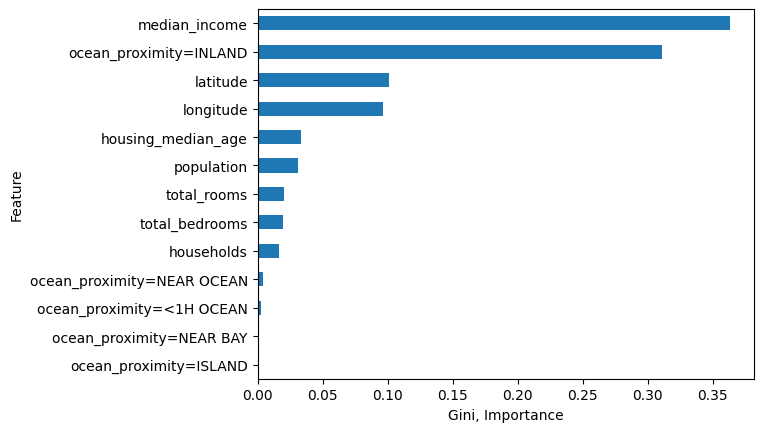

In [52]:
# Create horizontal bar chart
feat_imp.plot(kind="barh")
plt.xlabel("Gini, Importance")
plt.ylabel("Feature");

### Question 6
Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` first to `0.1` and then to `0.01`

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both gives same

In [80]:
%%capture output

regex = re.compile(r"\[|\]|<|_|=|-|\s", re.IGNORECASE)
features = dv.get_feature_names()
features = [regex.sub("", feat) if any(x in str(feat) for x in set(('[', ']', '<', '_', '=', '-'))) 
            else feat for feat in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]
etas = [0.3, 0.1, 0.01]
rmse_scores = []

for e in etas:
    xgb_params = {
        'eta': e, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)
    y_pred = model.predict(dval)
    rmse = np.sqrt(np.mean((y_val - y_pred) ** 2)).round(2)
    rmse_scores.append((e, rmse))



In [81]:
sorted(rmse_scores, key=lambda x: x[1])

[(0.3, 0.23), (0.1, 0.23), (0.01, 4.26)]

### Submit the results
- Submit your results here: [https://forms.gle/3yMSuQ4BeNuZFHTU8](https://forms.gle/3yMSuQ4BeNuZFHTU8)
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one